In [385]:
# from google.colab import drive
# drive.mount('/content/drive')

# path = "/content/drive/MyDrive/BSCS/BSCS-VII/ML/ML Project/cataract_data.csv"

In [386]:
path = "cataract_data.csv"
!mkdir images

A subdirectory or file images already exists.


In [387]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

original = pd.read_csv(path)
original.drop(["Unnamed: 0"], axis=1, inplace=True)
data = original.copy()

data.head()

count_learning_curves = 0
count_validation_curves = 0

In [388]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,dissimilarity,contrast,homogeneity,energy,ASM,correlation,Label
207,6.166919,205.924430,0.328997,0.123587,0.015274,0.930074,0.0
731,9.477318,557.400966,0.272183,0.092087,0.008480,0.876943,3.0
95,8.397298,482.936953,0.306400,0.116058,0.013469,0.905110,0.0
135,7.290546,311.537453,0.324660,0.121826,0.014842,0.907213,0.0
255,8.464698,422.919282,0.306340,0.115801,0.013410,0.898556,0.0


In [389]:
from sklearn.model_selection import learning_curve

def my_learning_curve(X, y, model, model_name):
    train_sizes, train_scores, test_scores = learning_curve( estimator=model, X = X, y = y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([-0.3, 1.3])
    plt.title(model_name)

    plt.savefig(f"images\\{count_learning_curves}_Learning_Curve_{model_name}.png")
    plt.show()

In [390]:
from sklearn.model_selection import validation_curve
def my_validation_curve(X, y, model, name, param_range, model_name):
    train_scores, test_scores = validation_curve(estimator=model, X=X, y=y, param_name=name, param_range=param_range, cv=10)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.title(model_name)
    plt.grid()
#     plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.ylim([-0.3, 1.3])
    
    plt.savefig(f"images\\{count_validation_curves}_Validation_Curve_{model_name}.png")

    plt.show()

In [391]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def show_curve(X, y):
    global count_learning_curves
    
    svmModel = svm.SVC(gamma='auto')
    knn = KNeighborsClassifier(11)
    lr = LogisticRegression(solver='liblinear',multi_class='auto')
    rf = RandomForestClassifier()
    nb = GaussianNB()

    my_learning_curve(X, y, svmModel, "SVM")
    my_learning_curve(X, y, knn, "KNN")
    my_learning_curve(X, y, lr, "Logistic Regression")
    my_learning_curve(X, y, rf, "Random Forest")
    my_learning_curve(X, y, nb, "Naive Bayes")
    
    count_learning_curves += 1
    

In [392]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def show_validation(X, y):
    global count_validation_curves
    
    svmModel = svm.SVC(gamma='auto')
    param_range_svm = np.logspace(-6, -1, 5)
    
    knn = KNeighborsClassifier()
    param_range_knn = [1, 3, 5, 7, 9, 11]
    
    lr = LogisticRegression()
    param_range_lr = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    my_validation_curve(X, y, svmModel, "gamma", param_range_svm, "SVM")
    my_validation_curve(X, y, knn, "n_neighbors", param_range_knn, "KNN")
    my_validation_curve(X, y, lr, 'C', param_range_lr, "Logistic Regression")
    
    count_validation_curves += 1

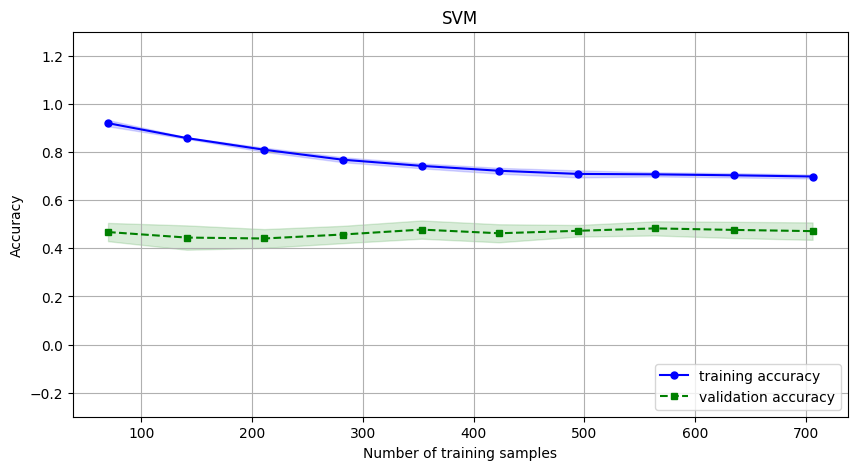

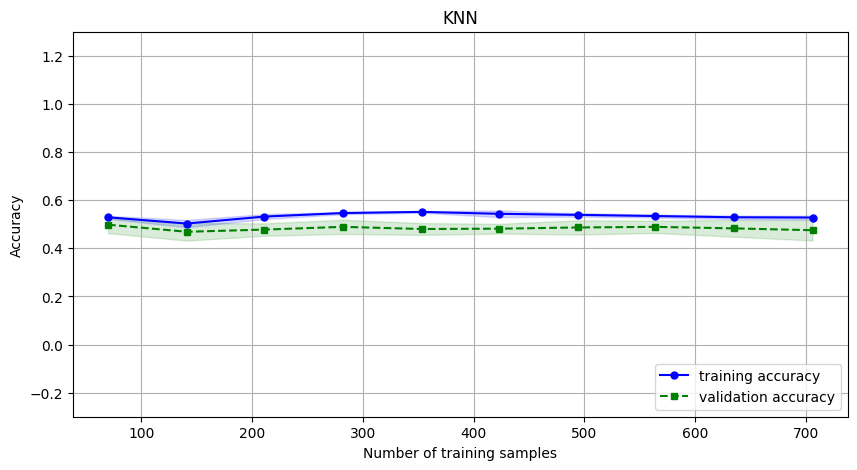

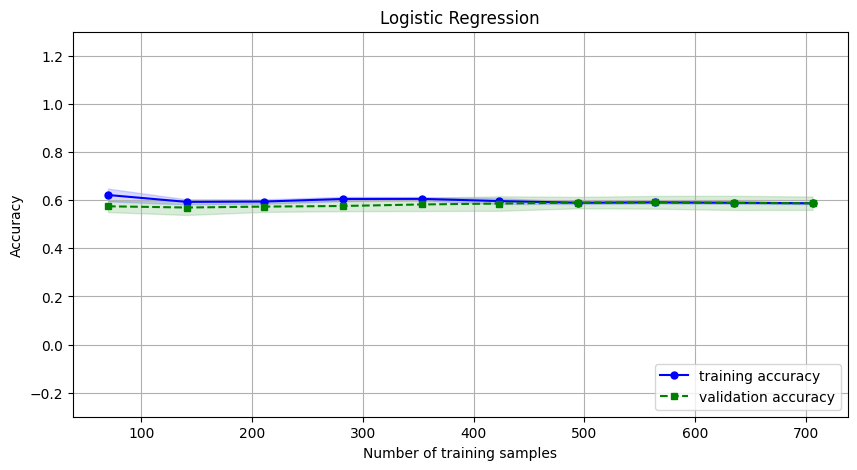

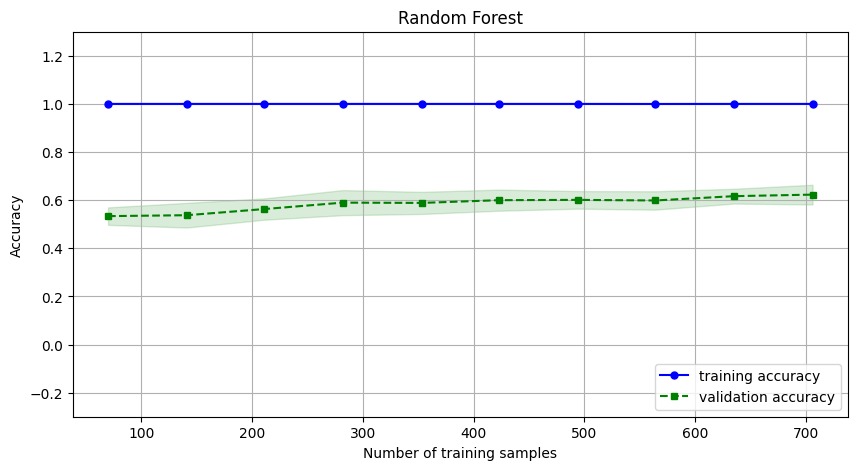

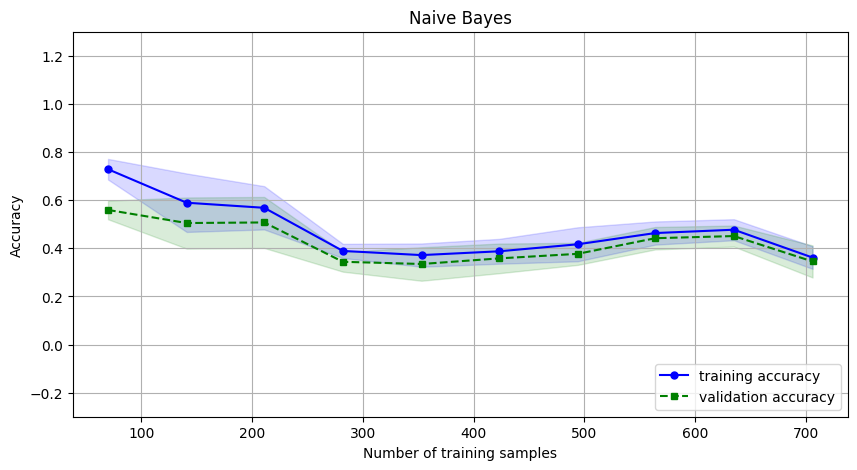

In [393]:
X = data.drop(['Label'], axis='columns')
y = data.Label
show_curve(X, y)

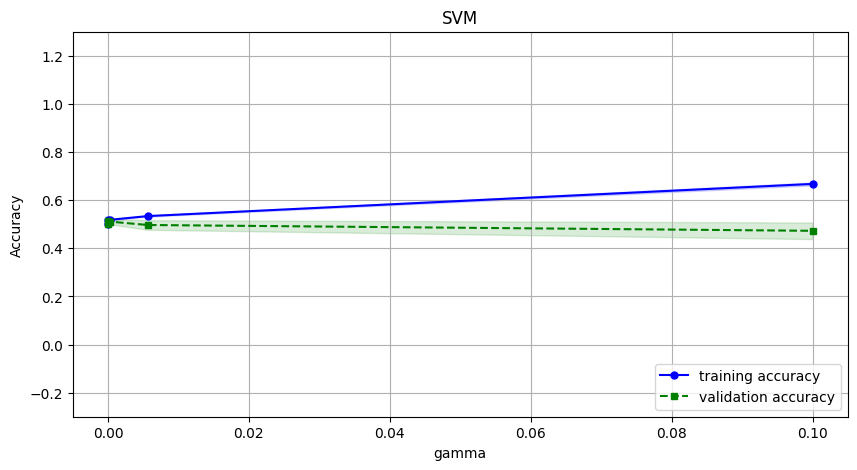

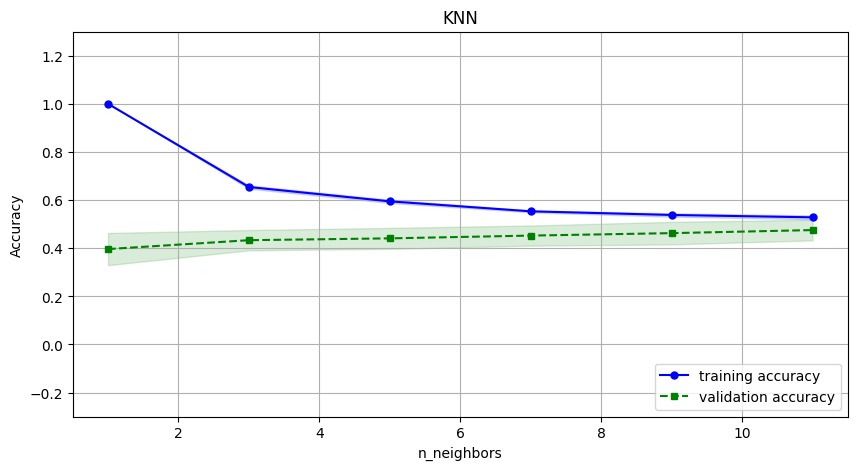

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

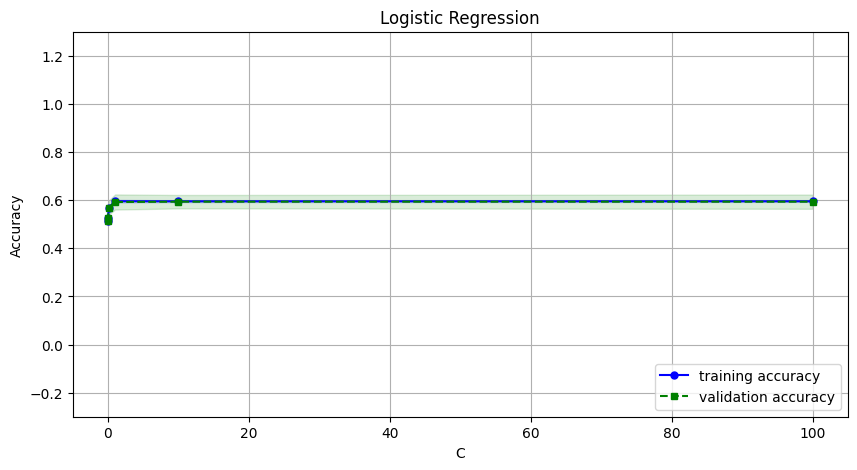

In [394]:
show_validation(X, y)

In [395]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(data)
# report.to_file("df_data.html")

In [396]:
original.drop_duplicates(subset=None, keep='first', inplace=True)
data = original.copy()
len(data)

758

In [397]:
data.describe()

,dissimilarity,contrast,homogeneity,energy,ASM,correlation,Label
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,7.963047,478.066616,0.330406,0.112732,0.012902,0.896936,0.994723
std,1.360342,184.680640,0.052589,0.013907,0.003268,0.039422,1.152780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.225090,345.820205,0.300424,0.106009,0.011238,0.885076,0.000000
50%,8.039949,464.679022,0.315990,0.113564,0.012897,0.901345,0.000000
75%,8.766800,588.362748,0.344717,0.119584,0.014300,0.912892,2.000000
max,15.950192,1247.978855,0.550628,0.197800,0.039125,0.980140,3.000000


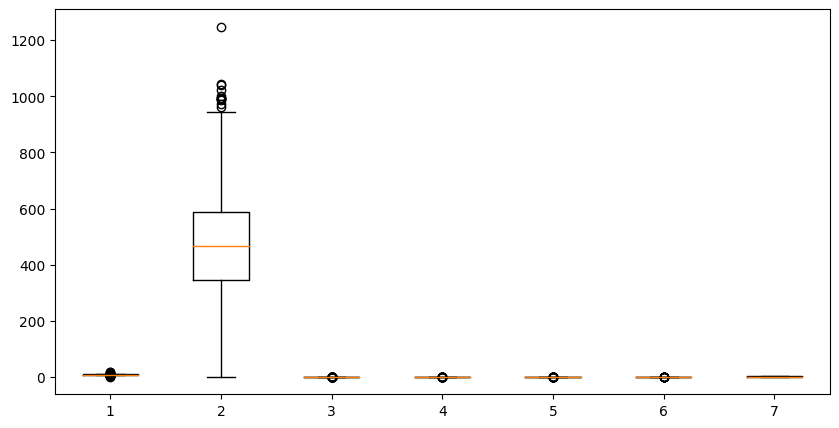

In [398]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.boxplot(data)
plt.show()

In [399]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data.head()

,dissimilarity,contrast,homogeneity,energy,ASM,correlation,Label
0,0.428847,0.163565,0.569752,0.490193,0.240289,0.913078,0.0
1,0.535542,0.268611,0.503874,0.473625,0.224321,0.930630,0.0
2,0.450275,0.241654,0.577853,0.528051,0.278838,0.905546,0.0
3,0.388553,0.179645,0.601453,0.525371,0.276015,0.932521,0.0
4,0.549578,0.461626,0.558038,0.571266,0.326345,0.906429,0.0


In [400]:
data.describe()

,dissimilarity,contrast,homogeneity,energy,ASM,correlation,Label
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,0.499245,0.383073,0.600053,0.569929,0.329756,0.915110,0.994723
std,0.085287,0.147984,0.095507,0.070310,0.083539,0.040221,1.152780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452978,0.277104,0.545603,0.535942,0.287234,0.903009,0.000000
50%,0.504066,0.372345,0.573872,0.574137,0.329633,0.919608,0.000000
75%,0.549636,0.471452,0.626043,0.604571,0.365506,0.931389,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


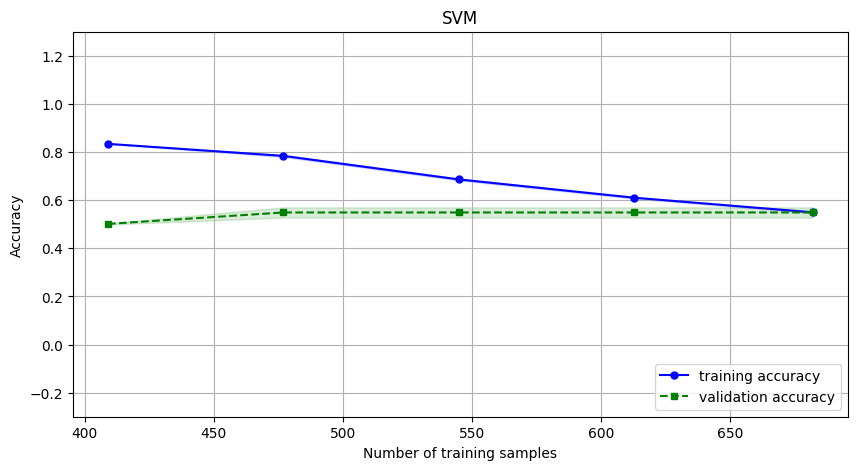

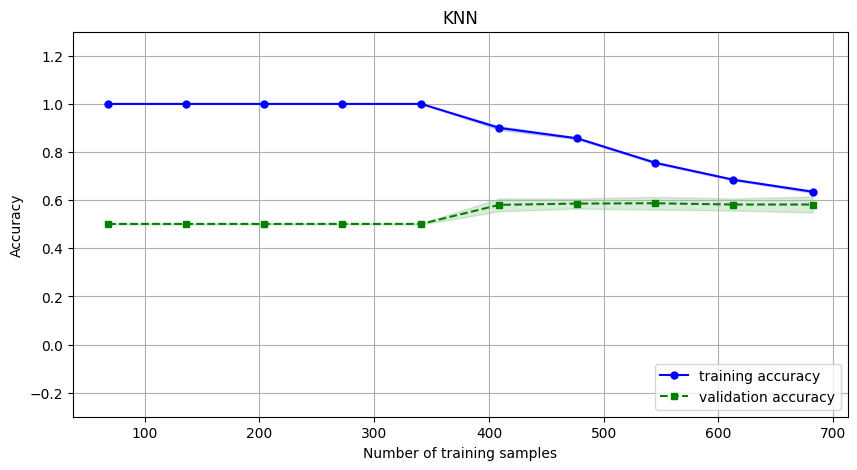

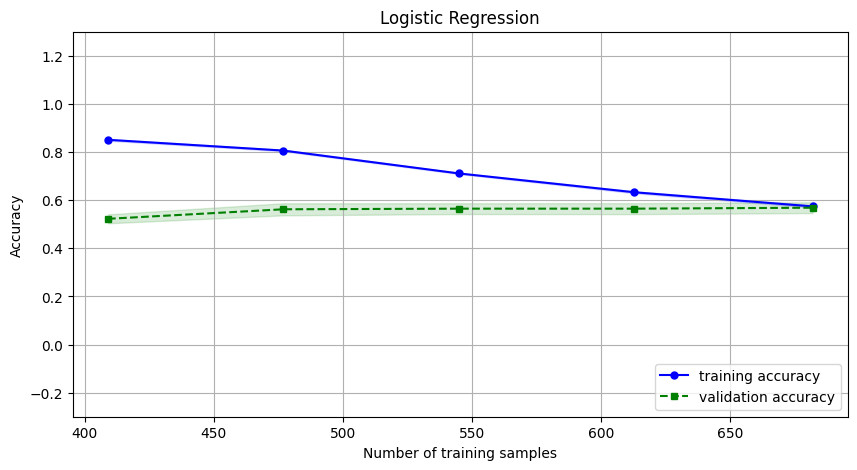

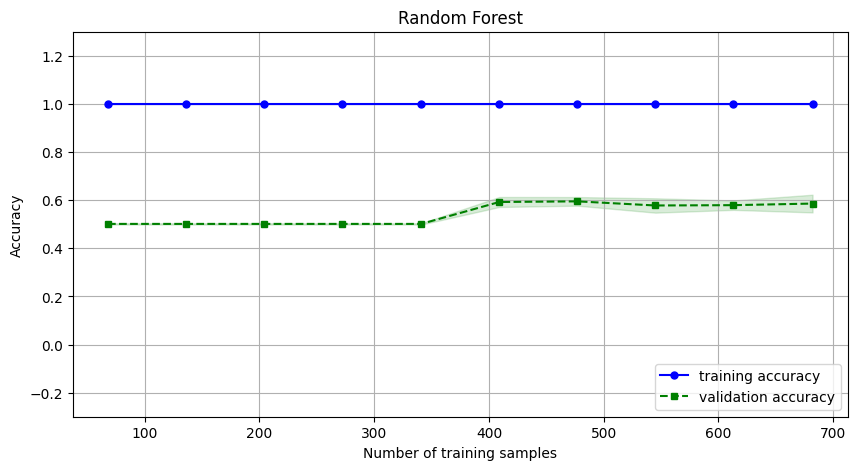

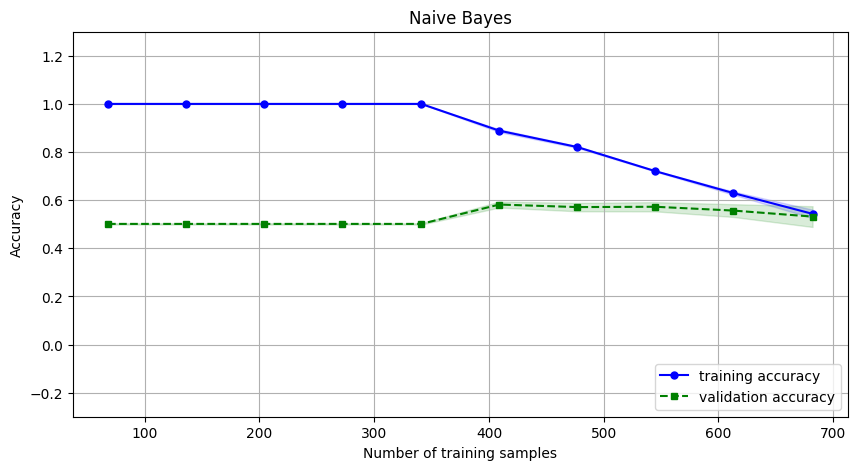

In [401]:
X = data.drop(['Label'], axis='columns')
y = data.Label
show_curve(X, y)

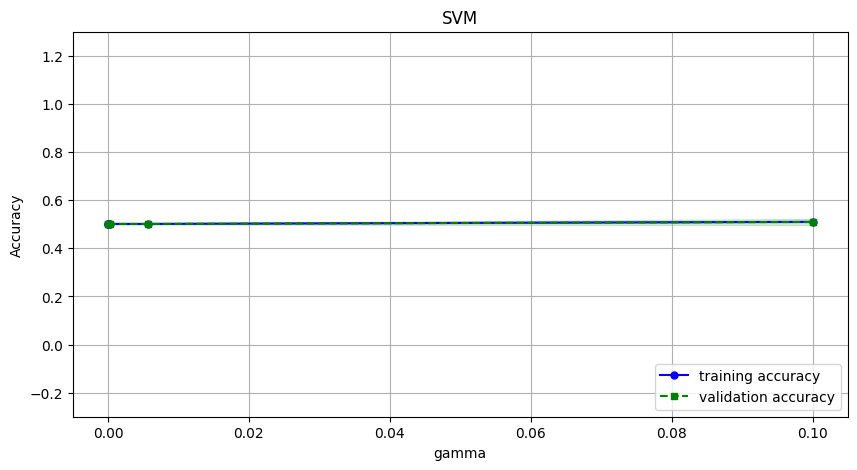

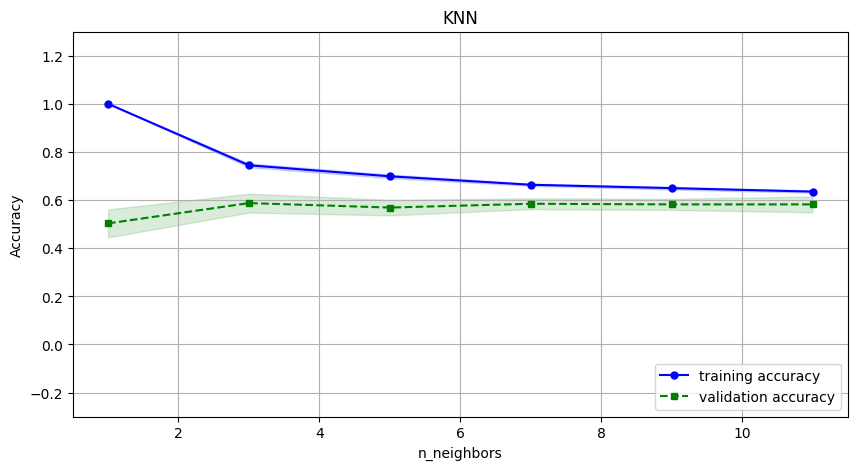

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

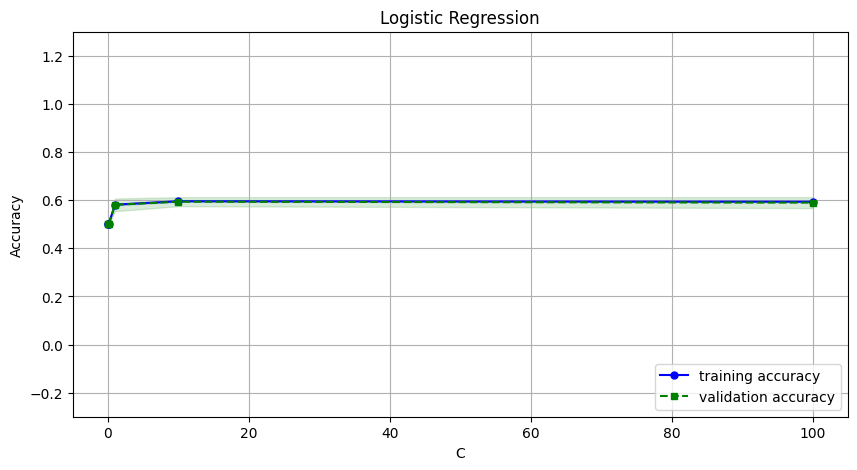

In [402]:
show_validation(X, y)

In [403]:
# Removing highly correlated features having correlation > 0.90
import numpy as np

cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop

C:\Users\Asad Computers\AppData\Local\Temp\ipykernel_9292\3805519725.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


['ASM']

In [404]:
original = original.drop(to_drop, axis=1)
data = data.drop(to_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 781
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dissimilarity  758 non-null    float64
 1   contrast       758 non-null    float64
 2   homogeneity    758 non-null    float64
 3   energy         758 non-null    float64
 4   correlation    758 non-null    float64
 5   Label          758 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


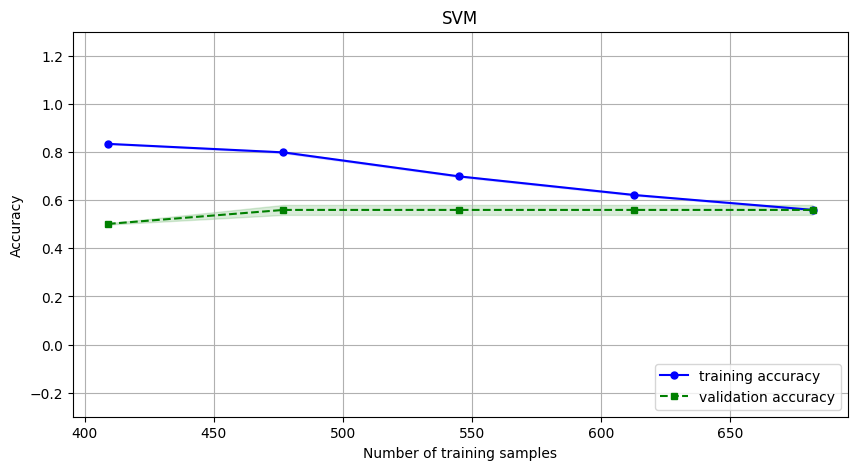

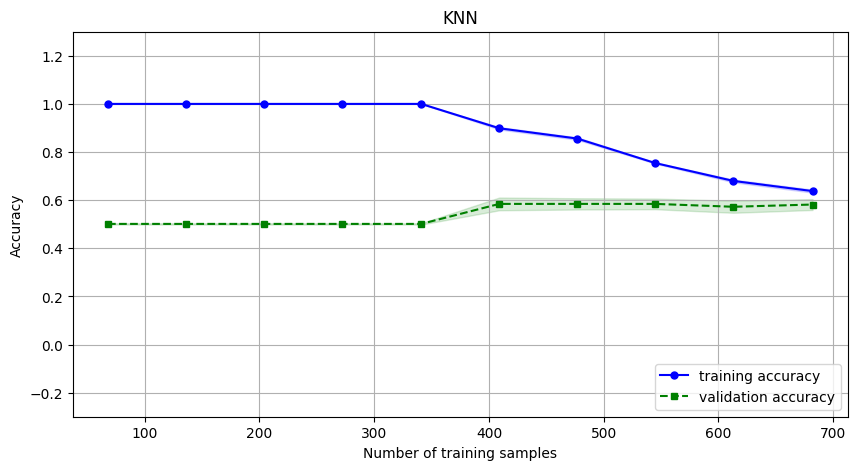

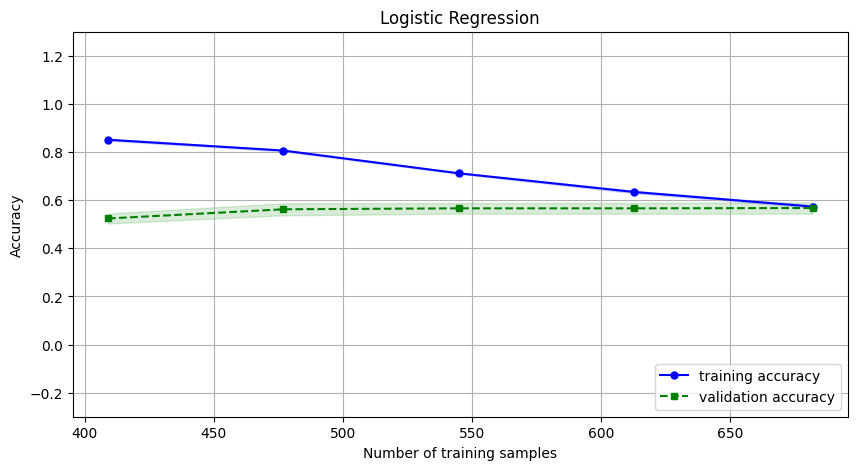

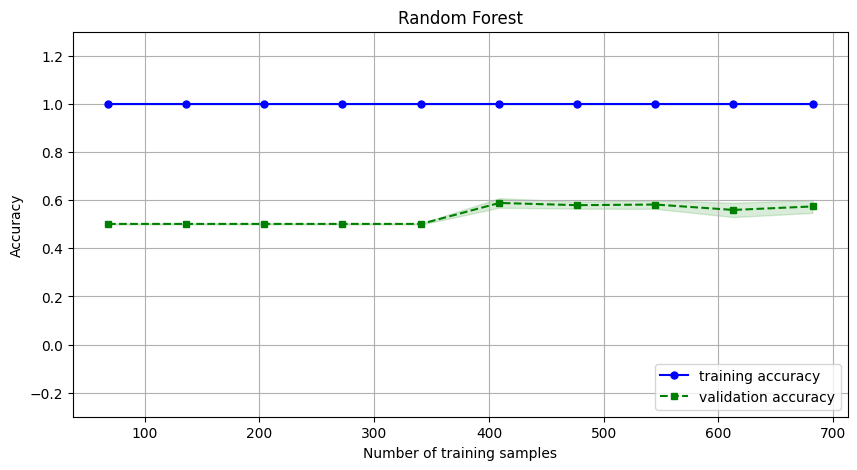

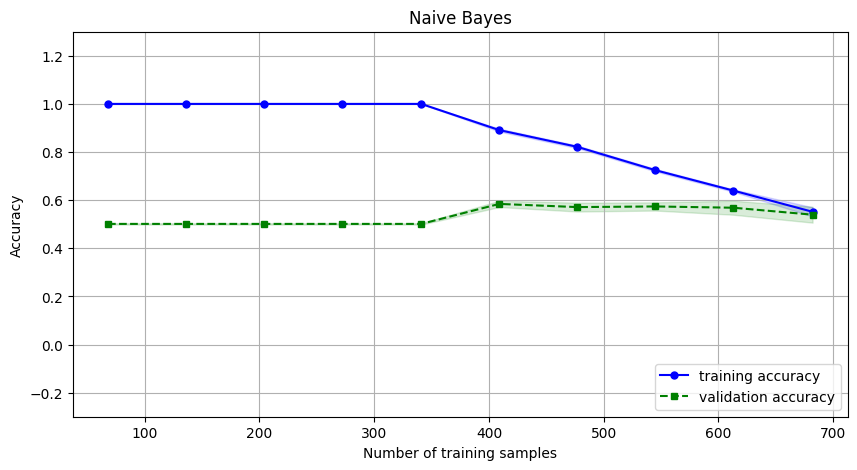

In [405]:
X = data.drop(['Label'], axis='columns')
y = data.Label
show_curve(X, y)

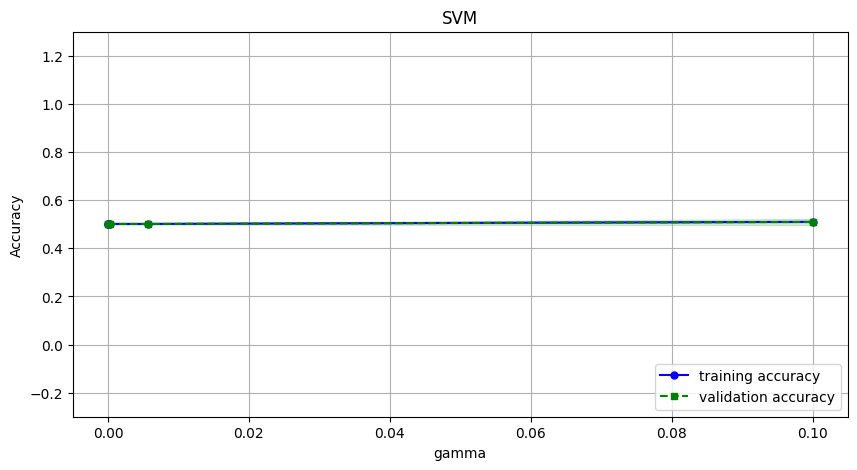

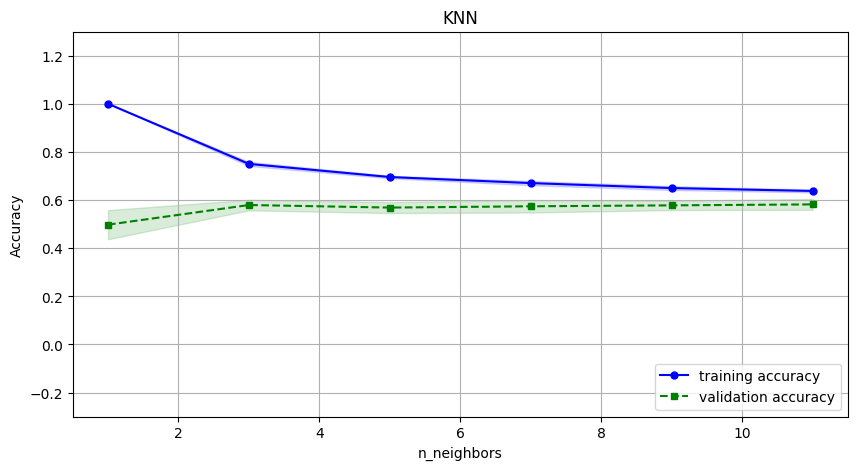

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

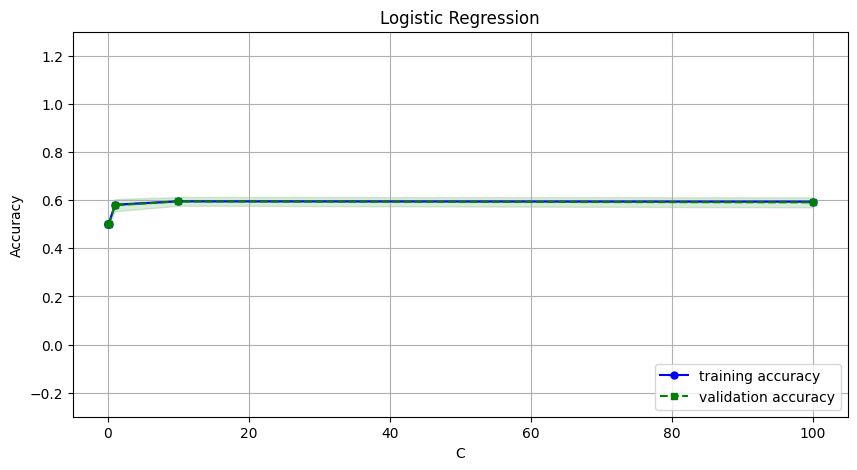

In [406]:
show_validation(X, y)

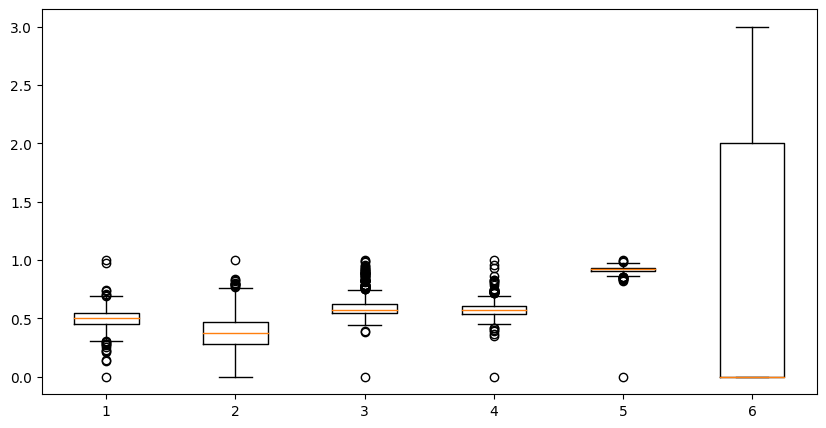

In [407]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.boxplot(data)
plt.show()

In [408]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# for c in original.columns[:-1]:
#     original = remove_outlier(original, c)

# for c in data.columns[:-1]:
#     data = remove_outlier(data, c)
# data.info()

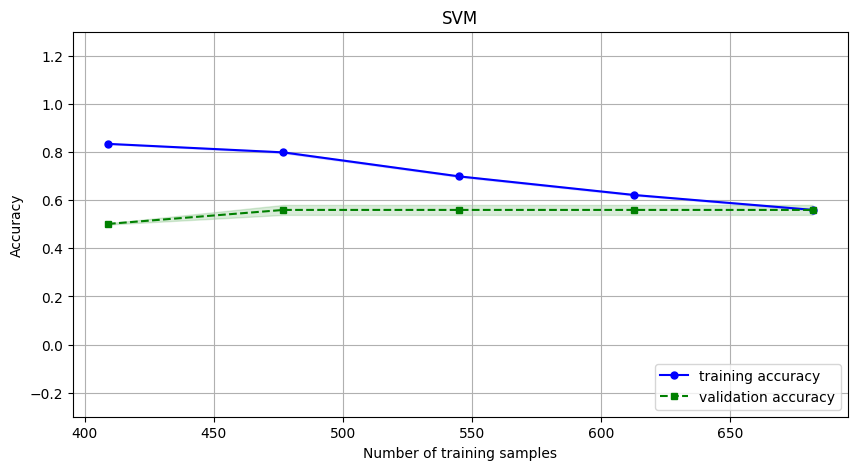

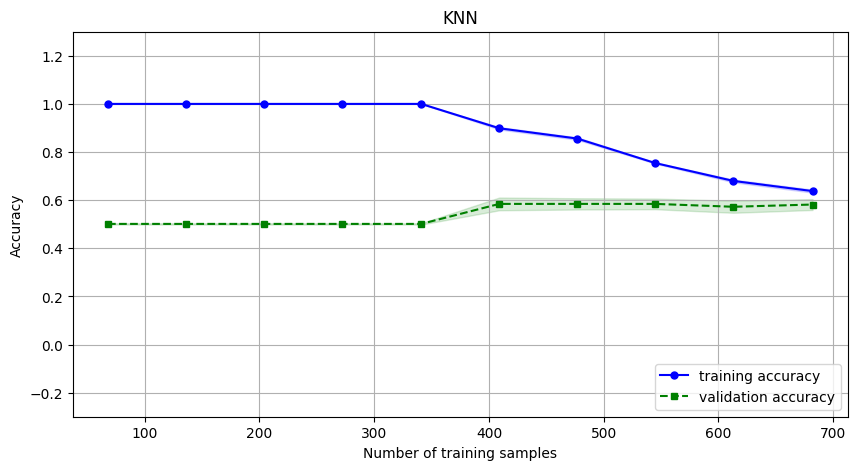

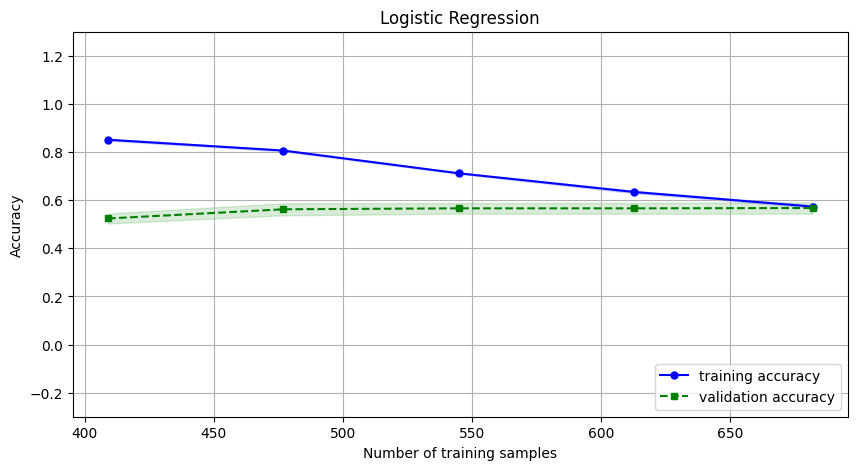

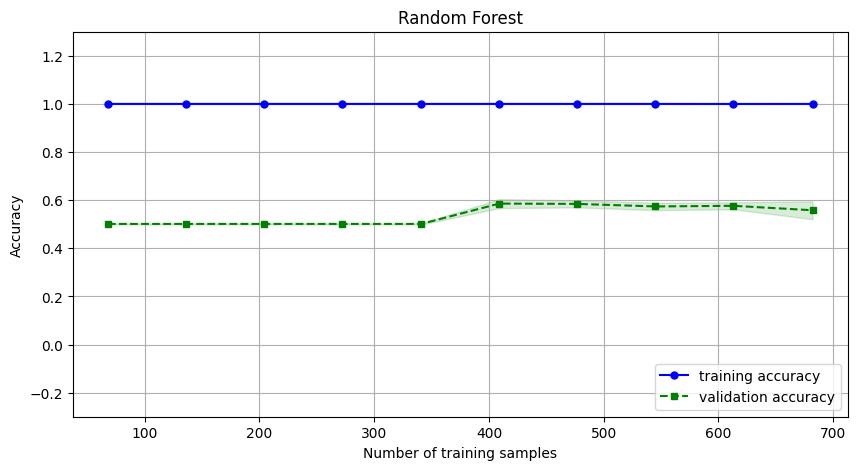

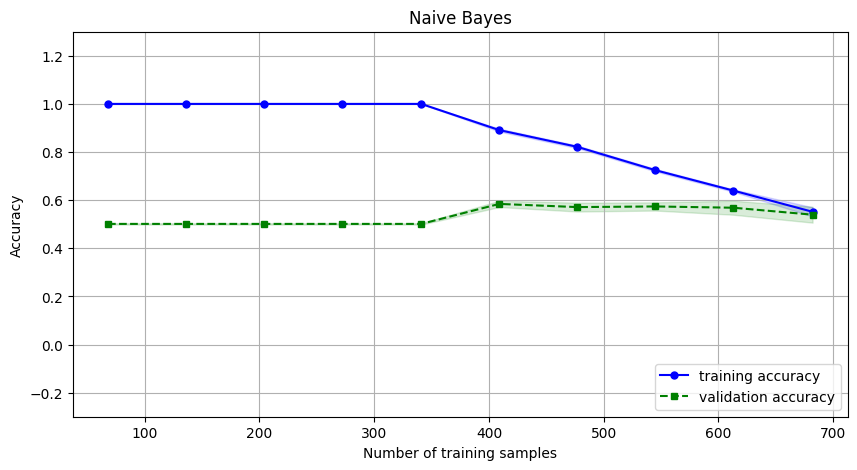

In [409]:
X = data.drop(['Label'], axis='columns')
y = data.Label
show_curve(X, y)

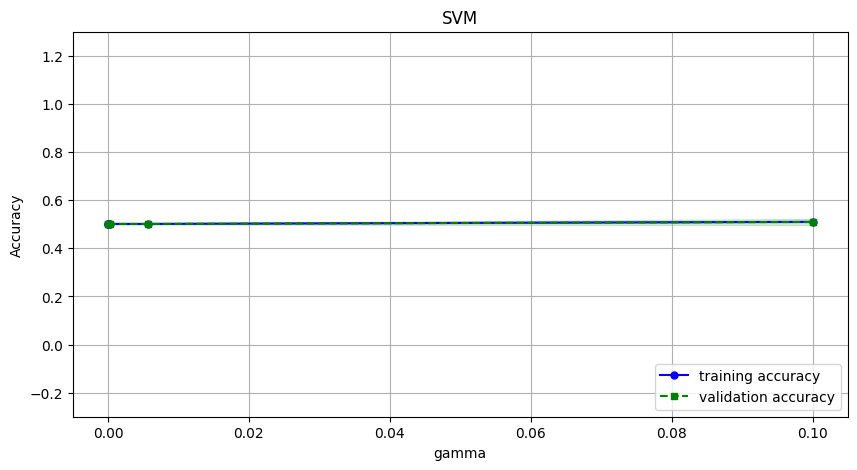

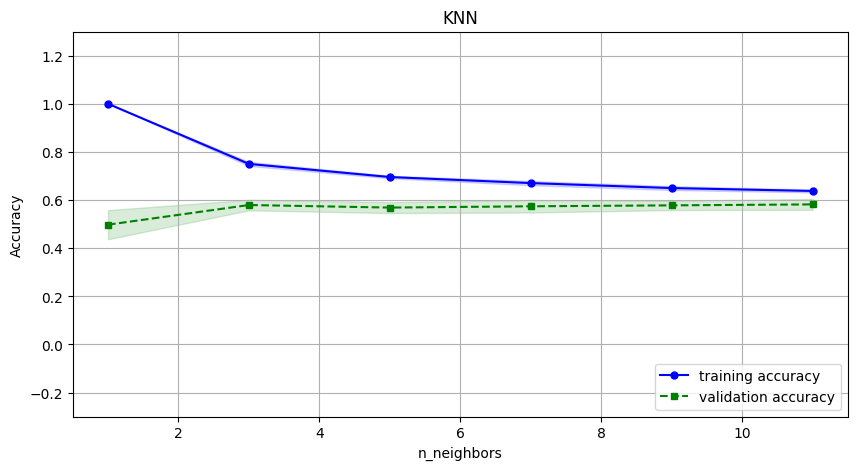

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

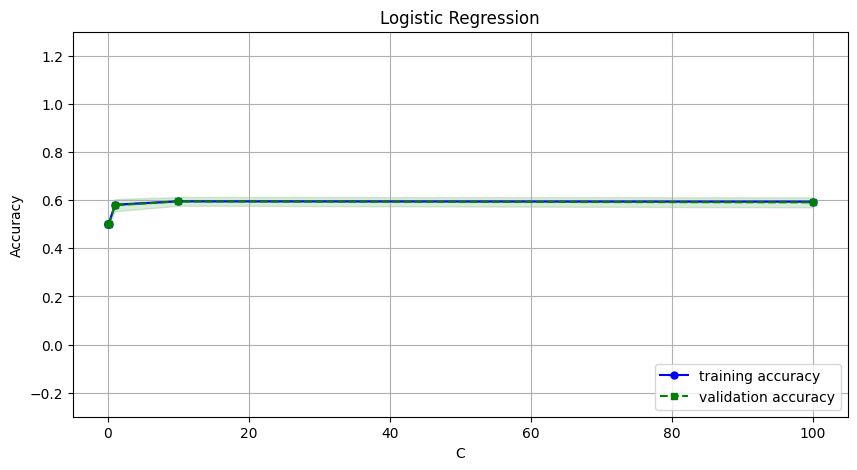

In [410]:
show_validation(X, y)

<AxesSubplot: xlabel='Label', ylabel='count'>

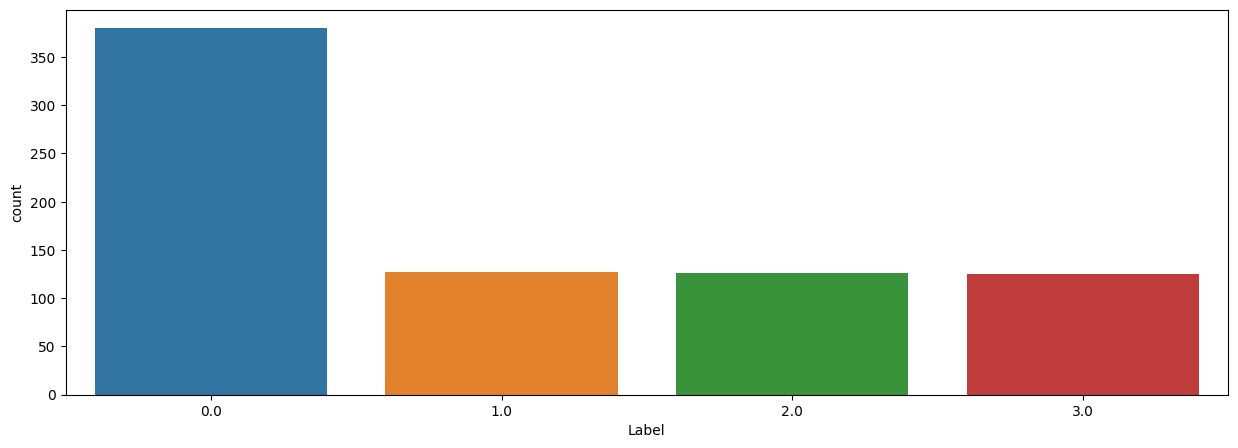

In [411]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(x=data['Label'], label="count")

In [412]:
# Oversampling
# pip install imbalanced-learn
X = data.drop(['Label'], axis='columns')
y = data.Label
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<AxesSubplot: xlabel='Label', ylabel='count'>

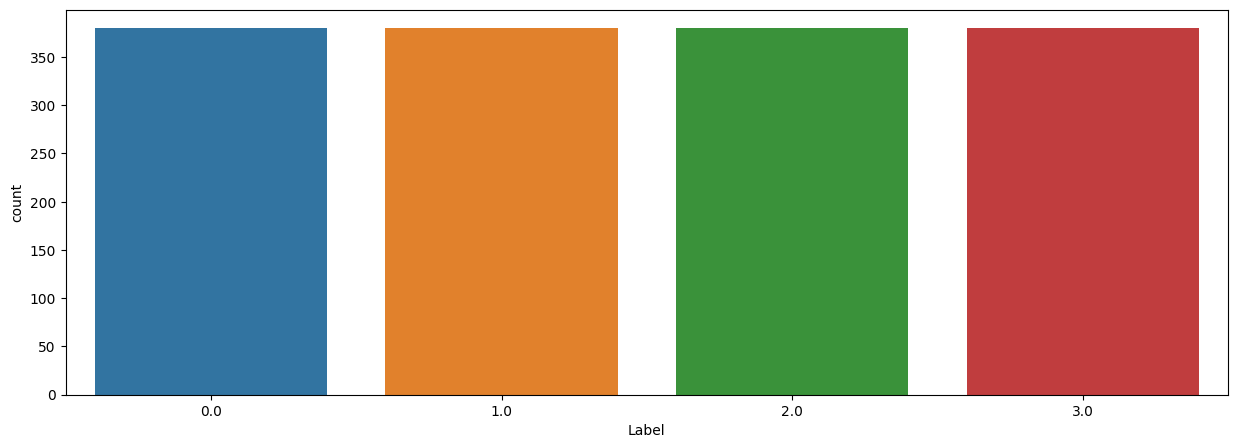

In [413]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(x=y, label="count")

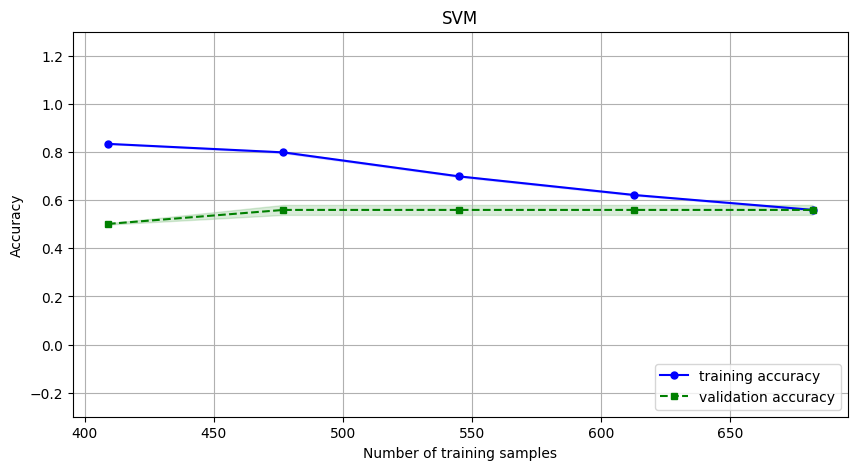

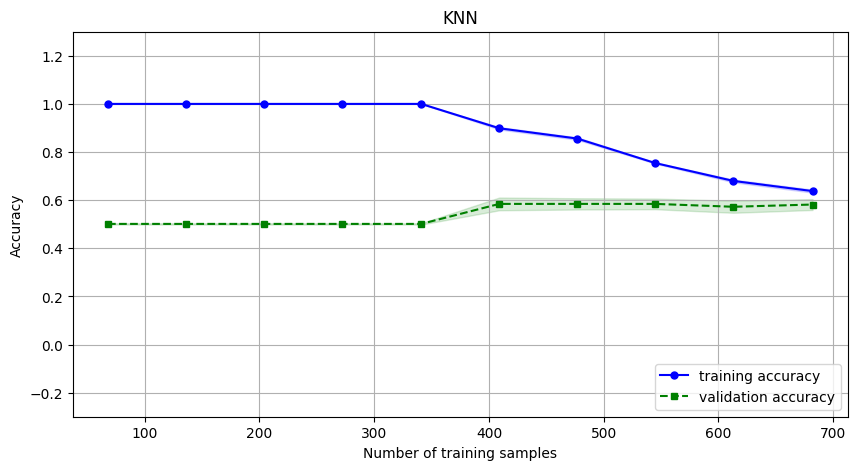

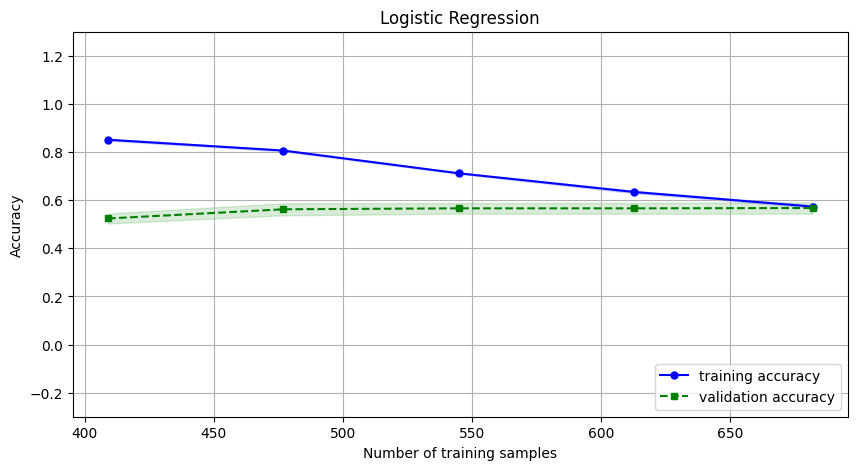

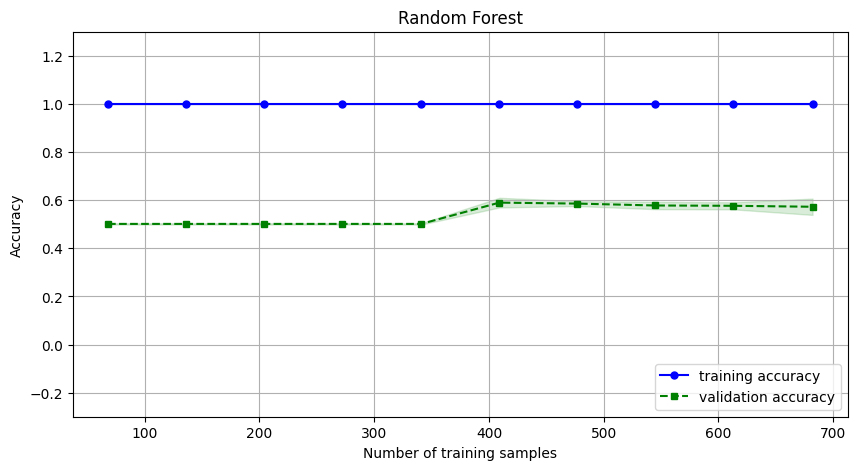

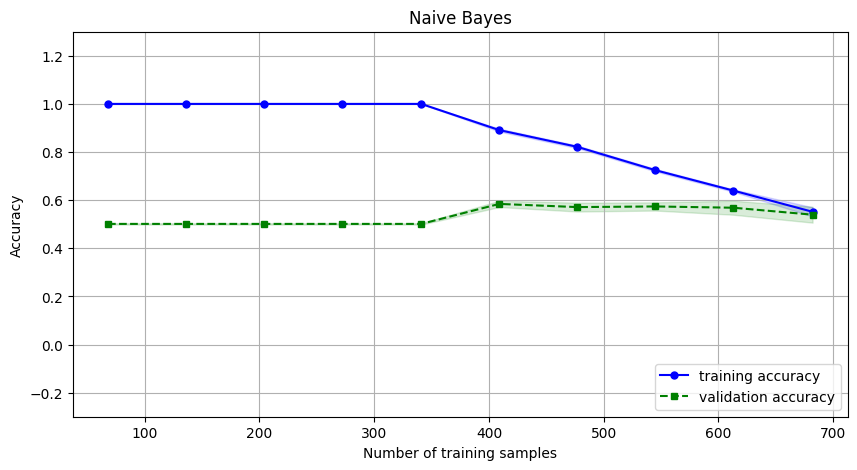

In [414]:
X = data.drop(['Label'], axis='columns')
y = data.Label
show_curve(X, y)

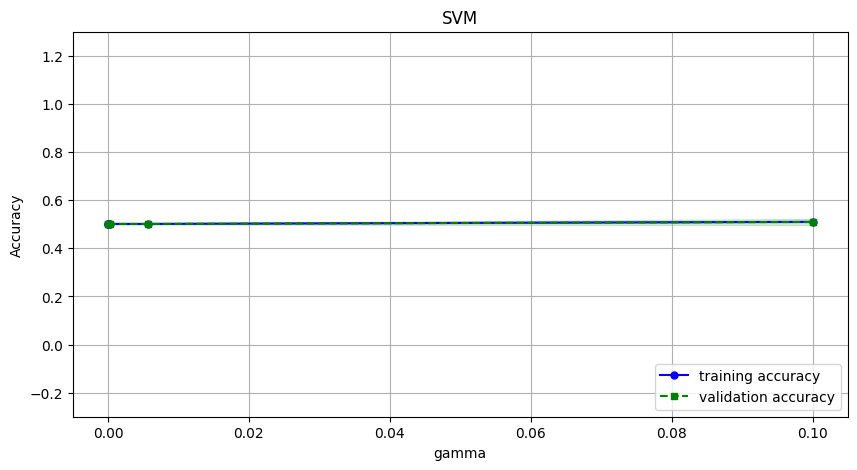

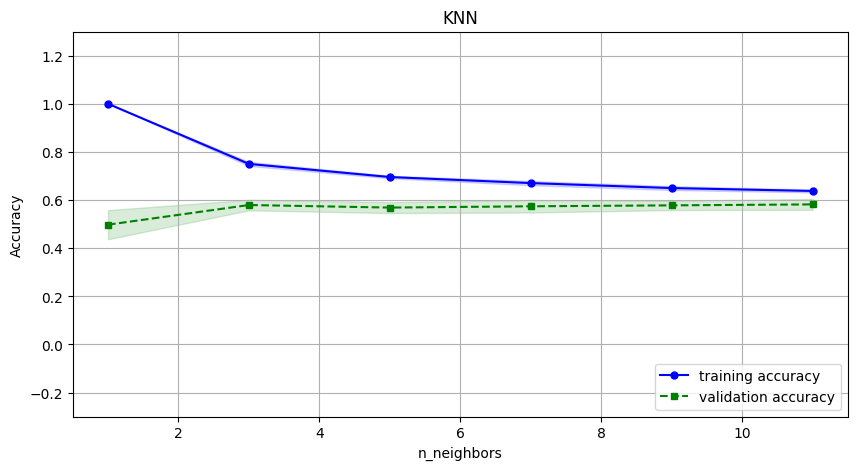

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

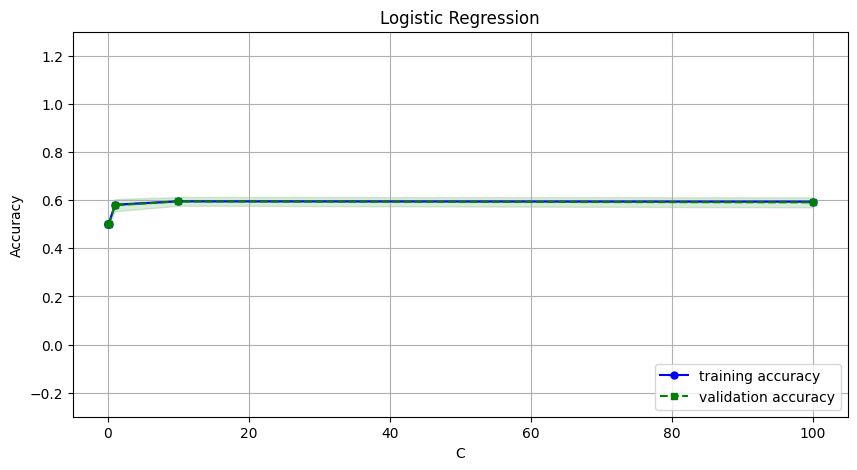

In [415]:
show_validation(X, y)

In [440]:
data = pd.read_csv(path)
data.drop(["ASM", "Unnamed: 0"], axis=1, inplace=True)
data = shuffle(data)
data.drop_duplicates(inplace=True, subset=None, keep='first')

X = data.drop(['Label'], axis='columns')
y = data.Label

,dissimilarity,contrast,homogeneity,energy,correlation,Label
190,8.404615,462.670006,0.305170,0.115420,0.914461,0.0
694,7.903162,523.403085,0.328132,0.111455,0.907698,3.0
721,8.866620,456.028714,0.297020,0.101884,0.876840,3.0
57,9.166970,484.925696,0.285169,0.094345,0.895105,0.0
496,6.863359,419.934647,0.382135,0.124090,0.887887,1.0


In [441]:
print(len(y))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(len(y))

758
1520


In [418]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

pipe = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(9)
)

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.618421052631579


In [419]:
from sklearn.metrics import confusion_matrix

y_pred = pipe.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[45  4 15 12]
 [ 2 68  5  1]
 [13  7 44 12]
 [17  4 24 31]]


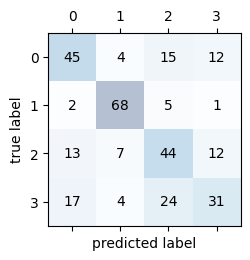

In [420]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [421]:
from sklearn.metrics import classification_report

report = classification_report(y_true = y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.58      0.59      0.59        76
         1.0       0.82      0.89      0.86        76
         2.0       0.50      0.58      0.54        76
         3.0       0.55      0.41      0.47        76

    accuracy                           0.62       304
   macro avg       0.61      0.62      0.61       304
weighted avg       0.61      0.62      0.61       304



In [422]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pipe.predict_proba(X), multi_class='ovr')

0.9028269275161587

In [423]:
import joblib

joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [425]:
import joblib
model = joblib.load("model.pkl")
model.score(X_test, y_test)

0.618421052631579

In [426]:
y_test[1]

0.0

In [437]:
model.predict(X_test.iloc[1, :].values.reshape(-1, 5))[0]

C:\Users\Asad Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.0